In [1]:
import pandas as pd 
import numpy as np

# 1. Pronóstico de demanda

**Consideraciones iniciales**

**Date:** se realiza pronóstico diario a excepción de los días domingo.

**Demand y Forescast**: Las cifras dependen de la unidad de medida de cada producto, es decir, puede ser kilos, unds, bultos, etc. 

**Warehouse:** Bodega desde la que se atendería dicha demanda

**Product_id:** Número único que identifica el producto pronosticado

In [2]:
forecast = pd.read_csv ("FORECAST_ERROR.csv") 
forecast.head(5)

,date,warehouse,product_id,demand,forecast
0,2023-07-18,ALQ,1223,2942.500000,2471.0
1,2023-06-02,ALQ,592,0.000000,12.0
2,2023-07-22,ALQ,558,11.144060,10.0
3,2023-07-15,ALQ,970,19.500000,15.0
4,2023-06-26,ALQ,144936,93.963409,122.0


## Análisis preliminar 

In [3]:
print("\033[1mConjunto de datos\n\033[0m")
print("Se tiene un total de "+ str(len(forecast['date']))+ " registros\n")

print("\033[1mTipo de datos\n\033[0m")
print(str(forecast.info())+ "\n")

print("\033[1mValores faltantes\n\033[0m")
print("Total de valores perdidos por variables son:\n"+ str(forecast.isnull().sum())+ "\n")

print("\033[1mDescriptivos estadisticos\n\033[0m")
print(str(forecast.describe()))

Conjunto de datos

Se tiene un total de 11364 registros

Tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        11364 non-null  object 
 1   warehouse   11364 non-null  object 
 2   product_id  11364 non-null  int64  
 3   demand      11364 non-null  float64
 4   forecast    11364 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 444.0+ KB
None

Valores faltantes

Total de valores perdidos por variables son:
date          0
warehouse     0
product_id    0
demand        0
forecast      0
dtype: int64

Descriptivos estadisticos

          product_id        demand      forecast
count   11364.000000  1.136400e+04  11364.000000
mean    63527.123196  1.919242e+02    192.172626
std    157532.604959  3.722652e+02    376.074785
min       252.000000 -7.105427e-16      0.000000
25%       593.000000  2.300000e+0

Podemos evidenciar que que la media tanto de la demanda y el forescast son muy cercanos, así como percentiles, por lo tanto podemos afirmar que el pronóstico que realiza la compañia predice muy bien el comportamiento de la demanda.

## Transformación de variables

In [4]:
import pandas as pd

# Transformación de la variable date

forecast['date'] = pd.to_datetime(forecast['date'], format="%Y-%m-%d").dt.date


In [5]:
# Convertir product_id en object

forecast['product_id'] = forecast['product_id'].astype('object')

## Gráfico de productos

In [6]:
ordenes_compra = pd.read_csv("PURCHASE_ORDERS-PRICES.csv")
ordenes_compra.head(5)

,warehouse_code,region_code,id,delivery_date,product_id,name,step_unit,supplier_id,price,quantity
0,ALQ,BOG,12818963,2023-08-26,935,Ají Pimiento Estándar Kg,0.5,253,7000.0,14.0
1,ALQ,BOG,12632793,2023-08-05,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,13.0
2,ALQ,BOG,12504845,2023-07-22,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,15.0
3,ALQ,BOG,12568418,2023-07-29,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,12.0
4,ALQ,BOG,12441285,2023-07-15,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,13.0


In [7]:
# Agrupar por 'product_id'

name = ordenes_compra[["product_id", "name"]]
forecast_name = pd.merge(forecast, name, on='product_id', how='left')
forecast_name.head(5)

,date,warehouse,product_id,demand,forecast,name
0,2023-07-18,ALQ,1223,2942.5,2471.0,Cebolla Cabezona Blanca Sin Pelar Tamaño Mixto...
1,2023-07-18,ALQ,1223,2942.5,2471.0,Cebolla Cabezona Blanca Sin Pelar Tamaño Mixto...
2,2023-07-18,ALQ,1223,2942.5,2471.0,Cebolla Cabezona Blanca Sin Pelar Tamaño Mixto...
3,2023-07-18,ALQ,1223,2942.5,2471.0,Cebolla Cabezona Blanca Sin Pelar Tamaño Mixto...
4,2023-07-18,ALQ,1223,2942.5,2471.0,Cebolla Cabezona Blanca Sin Pelar Tamaño Mixto...


Todavia no se puede cruzar con la base de ordenes porque no se tienen los mismos id_product en ambos dataframes.

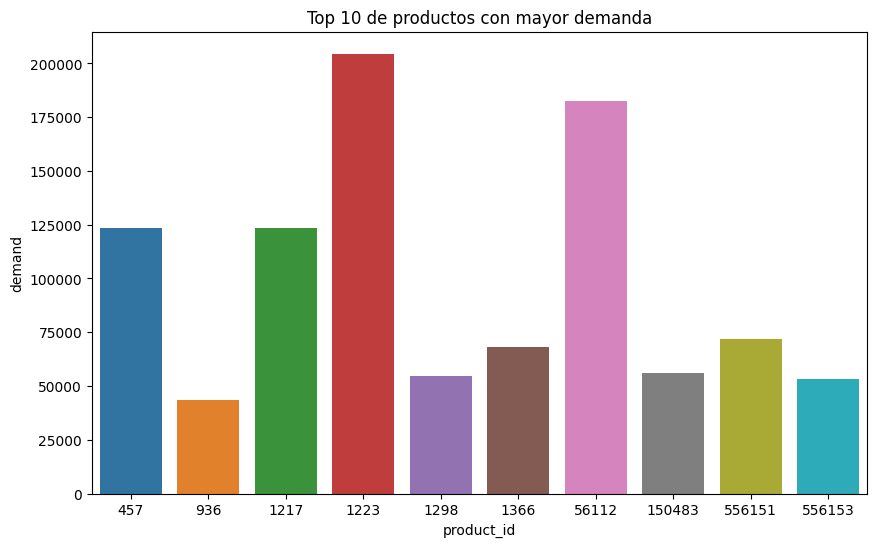

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


product = forecast.groupby('product_id').agg({'demand': 'sum', 'forecast': 'sum'}).reset_index()
Top_10 = product.sort_values(by = ["demand"], ascending = False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data= Top_10, x= "product_id", y= "demand")
plt.title("Top 10 de productos con mayor demanda")
plt.show()


## Gráfico de comportamiento histórico de la demanda

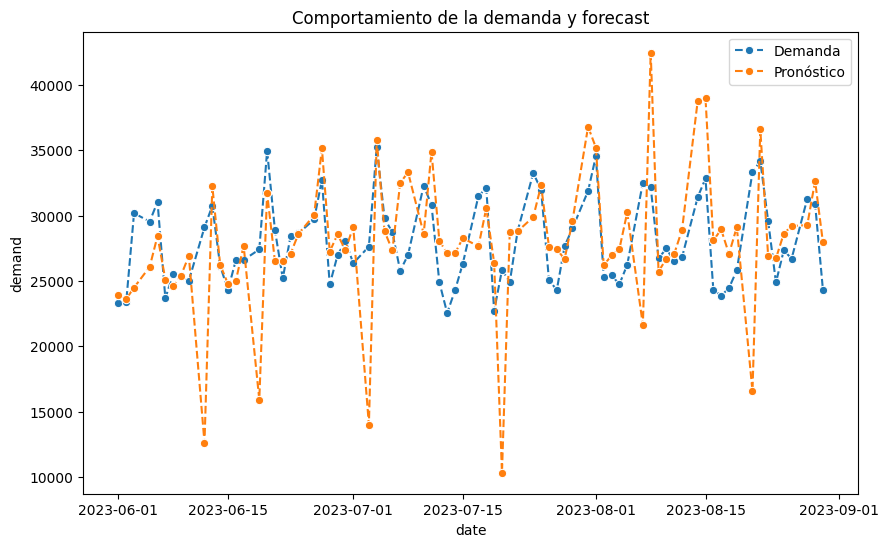

In [9]:
date = forecast.groupby('date').agg({'demand': 'sum', 'forecast': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))

# Graficar la demanda
sns.lineplot(data=date, x="date", y="demand", marker="o", linestyle="dashed", label="Demanda")

# Graficar el pronóstico
sns.lineplot(data=date, x="date", y="forecast", marker="o", linestyle="dashed", label="Pronóstico")

plt.title("Comportamiento de la demanda y forecast")
plt.show()

## Gráfico por bodega

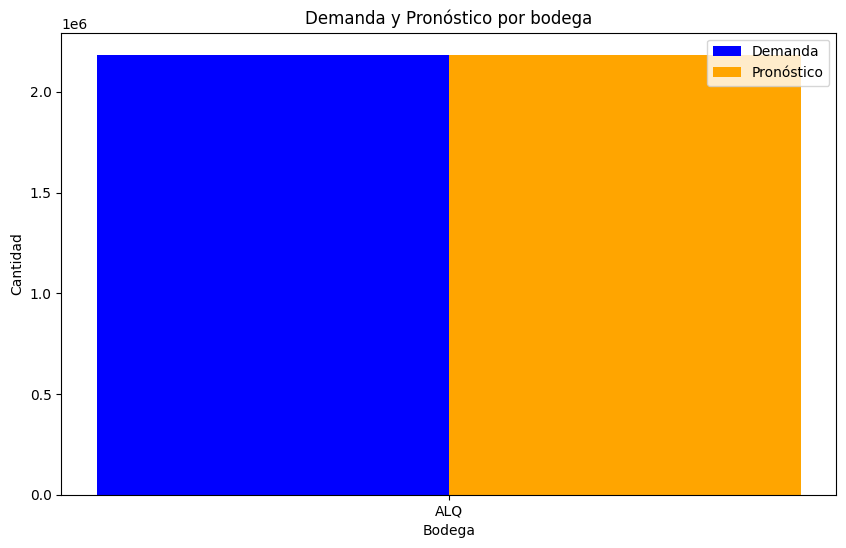

In [10]:
bodega = forecast.groupby('warehouse').agg({'demand': 'sum', 'forecast': 'sum'}).reset_index()



plt.figure(figsize=(10, 6))

# Calcular la posición de las barras
bar_width = 0.35
bar_positions_demand = np.arange(len(bodega['warehouse']))
bar_positions_forecast = bar_positions_demand + bar_width

# Barplot agrupado
plt.bar(bar_positions_demand, bodega['demand'], width=bar_width, label='Demanda', color='blue')
plt.bar(bar_positions_forecast, bodega['forecast'], width=bar_width, label='Pronóstico', color='orange')

# Configuraciones adicionales
plt.title("Demanda y Pronóstico por bodega")
plt.xlabel("Bodega")
plt.ylabel("Cantidad")
plt.xticks(bar_positions_demand + bar_width / 2, bodega['warehouse'])  # Etiquetas de eje x
plt.legend()





# 2. Ordenes de compra

**Consideraciones iniciales**

**warehouse_code:** Código de la bodega para la cual se hizo la compra

**region_code**: Código de la región en donde se encuentra la bodega

**id:** Número único que identifica la orden de compra

**delivery_date:** Fecha de ingreso del producto a bodega

**Product_id:** Número único que identifica el producto comprado

**Name:** Nombre del producto junto con las unidades

**step_unit:** Unidad en la que viene el producto. Por ejemplo, para el producto "Ají Pimiento Estándar Kg" el step unit de 0.5 indica que las unidades compradas son de 0.5kg, por lo cual si el quantity es de 14, se compraron en total 7kg.

**supplier_id:** Número único de identificación del vendedor

**price:** Precio total de compra

**quantity:** Unidades compradas de dicho producto


In [11]:
ordenes_compra = pd.read_csv("PURCHASE_ORDERS-PRICES.csv")
ordenes_compra.head(5)

,warehouse_code,region_code,id,delivery_date,product_id,name,step_unit,supplier_id,price,quantity
0,ALQ,BOG,12818963,2023-08-26,935,Ají Pimiento Estándar Kg,0.5,253,7000.0,14.0
1,ALQ,BOG,12632793,2023-08-05,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,13.0
2,ALQ,BOG,12504845,2023-07-22,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,15.0
3,ALQ,BOG,12568418,2023-07-29,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,12.0
4,ALQ,BOG,12441285,2023-07-15,935,Ají Pimiento Estándar Kg,0.5,253,7500.0,13.0


# Análisis preliminar 

In [12]:
print("\033[1mConjunto de datos\n\033[0m")
print("Se tiene un total de "+ str(len(ordenes_compra['warehouse_code']))+ " registros\n")

print("\033[1mTipo de datos\n\033[0m")
print(str(ordenes_compra.info())+ "\n")

print("\033[1mValores faltantes\n\033[0m")
print("Total de valores perdidos por variables son:\n"+ str(ordenes_compra.isnull().sum())+ "\n")

print("\033[1mDescriptivos estadisticos\n\033[0m")
print(str(ordenes_compra.describe()))

Conjunto de datos

Se tiene un total de 2184 registros

Tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   warehouse_code  2184 non-null   object 
 1   region_code     2184 non-null   object 
 2   id              2184 non-null   int64  
 3   delivery_date   2184 non-null   object 
 4   product_id      2184 non-null   int64  
 5   name            2184 non-null   object 
 6   step_unit       2184 non-null   float64
 7   supplier_id     2184 non-null   int64  
 8   price           2184 non-null   float64
 9   quantity        2184 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 170.8+ KB
None

Valores faltantes

Total de valores perdidos por variables son:
warehouse_code    0
region_code       0
id                0
delivery_date     0
product_id        0
name              0
step_unit         0
supplier

# Transformación de variables

In [13]:
import pandas as pd

# Transformación de la variable date

ordenes_compra['delivery_date'] = pd.to_datetime(ordenes_compra['delivery_date'], format="%Y-%m-%d").dt.date

# Convertir variables a object

ordenes_compra['id'] = ordenes_compra['id'].astype('object')
ordenes_compra['product_id'] = ordenes_compra['product_id'].astype('object')
ordenes_compra['supplier_id'] = ordenes_compra['supplier_id'].astype('object')

# Gráfico por proveedor

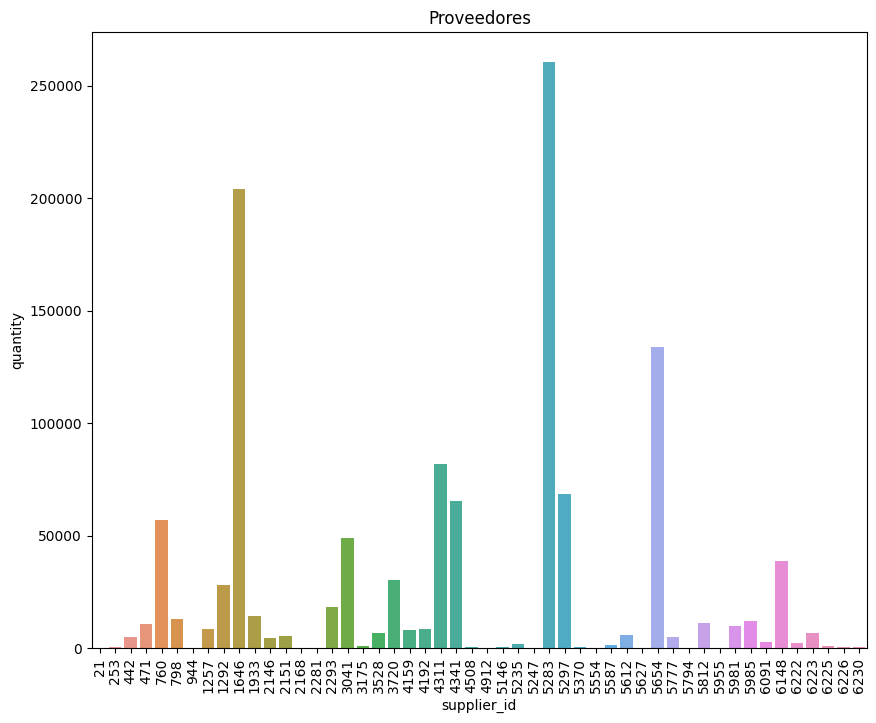

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


supplier = ordenes_compra.groupby('supplier_id')['quantity'].sum().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data= supplier, x= "supplier_id", y= "quantity")
plt.xticks(rotation=90)
plt.title("Proveedores")
plt.show()

# Gráfico por producto

/Users/linaherrera/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129297 (\N{MONEY-MOUTH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


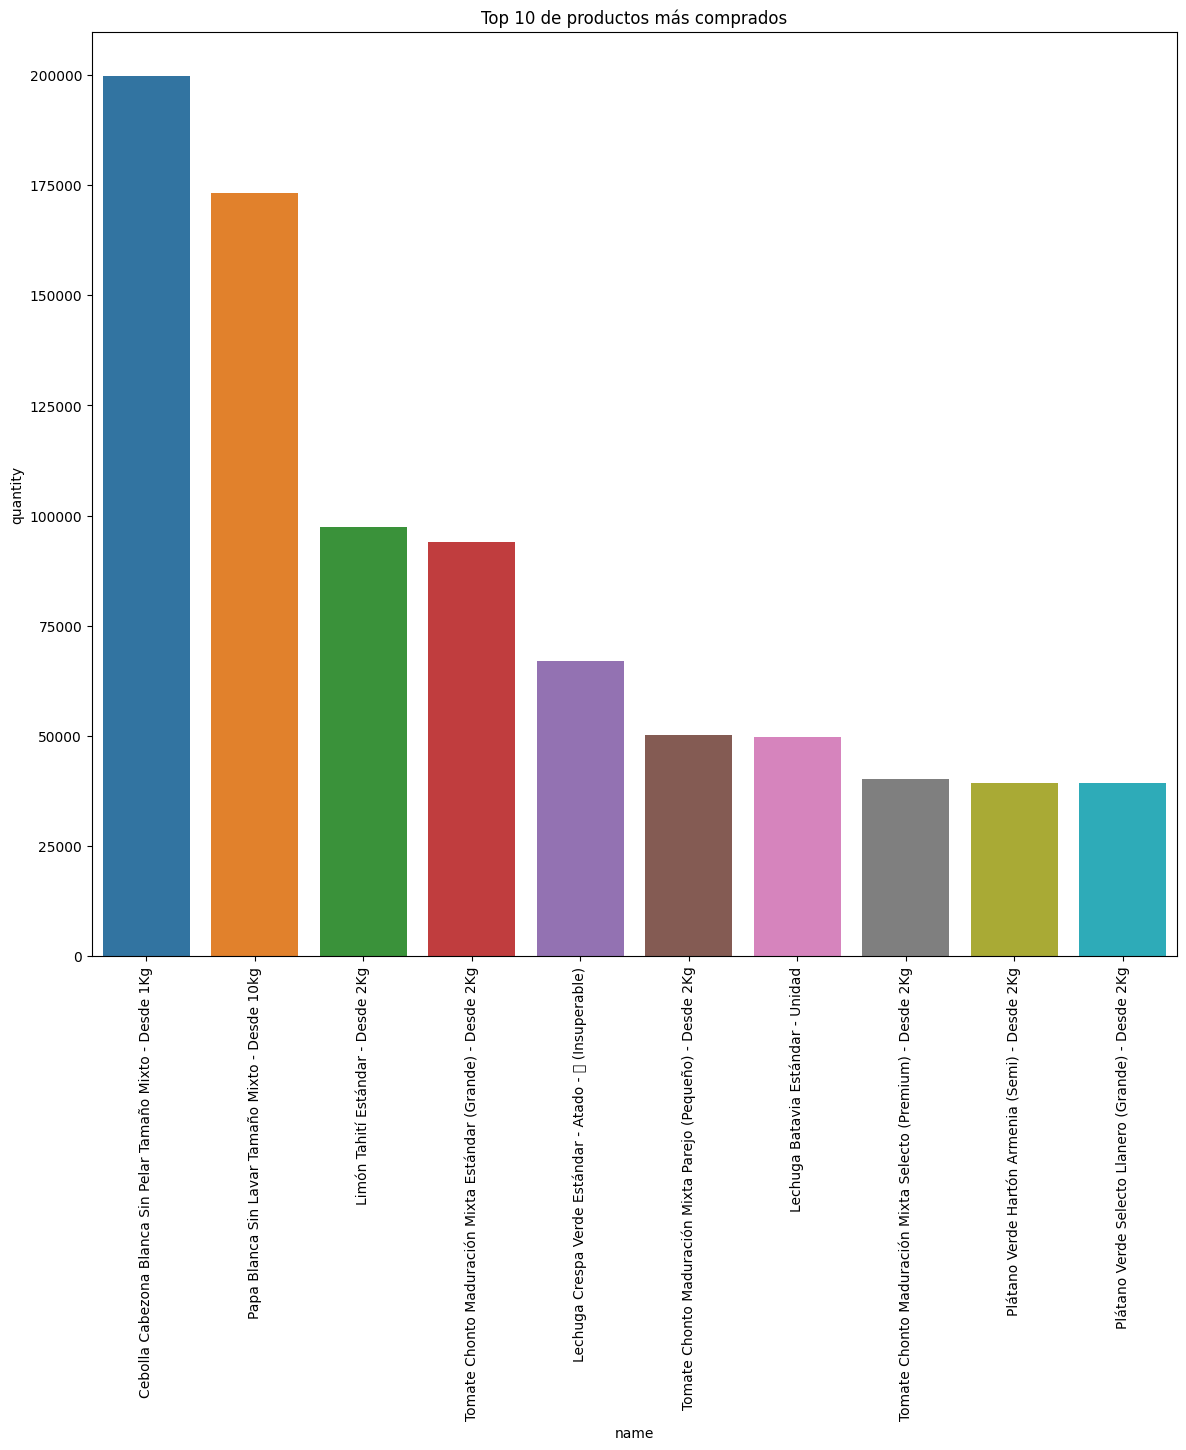

In [15]:
supplier = ordenes_compra.groupby('name')['quantity'].sum().reset_index()
Top_10_productos = supplier.sort_values(by = ['quantity'], ascending = False).head(10)
plt.figure(figsize=(14, 12))
sns.barplot(data= Top_10_productos, x= "name", y= "quantity")
plt.xticks(rotation=90)
plt.title("Top 10 de productos más comprados")
plt.show()


# Gráfico de precio

In [16]:
ordenes_compra["precio_unitario"] = ordenes_compra["price"]/ordenes_compra["quantity"]

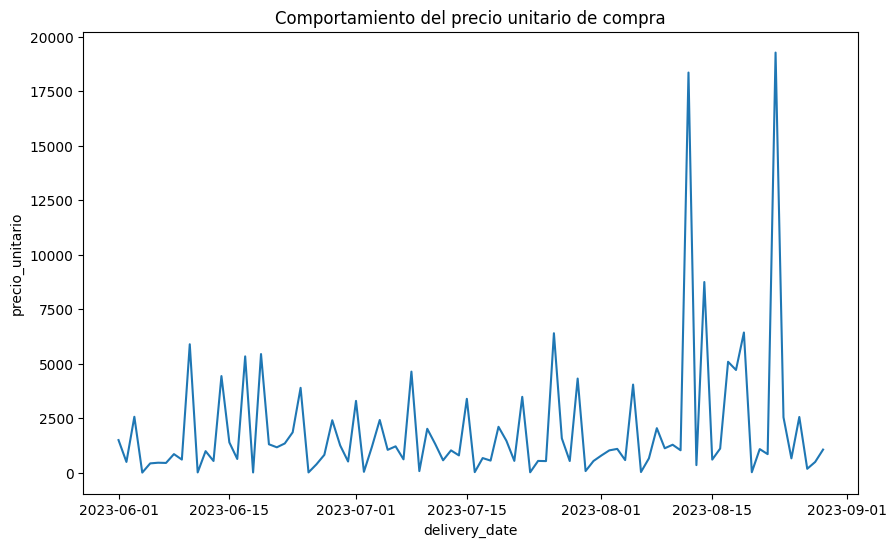

In [17]:
date_supplier = ordenes_compra.groupby('delivery_date')['precio_unitario'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Graficar el pronóstico
sns.lineplot(data=date_supplier, x="delivery_date", y="precio_unitario")
plt.title("Comportamiento del precio unitario de compra")
plt.show()